In [0]:
pip install pdpbox shap

Python interpreter will be restarted.
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=777396eb195b64784521cb7e59b47b6686e4e2fc07069f847e5ca82c5da417b4
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12060159 sha256=78159b02b642488bc99375c8283712047c690b873087d0120b380e1d685314a9
  Stored in directory: /root/.cache/pip/wheels/25/d0/ab/05f776f079a53f4c6a12c98220910f4d0d245609b8c673a5ad
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2971 sha256=95b86d70d0baaff1c646ced88f257bf3a8240313630385bf802963ff4b6dc3d4
  Stored in directory: /root/.cache/pip/wheels/36/49/c9/2374f1dee1b599effabf63d948635e6608f62d0ccde027b7e2
Successfully built pdpbox matplotlib sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Not uninstalling matplotlib 

In [0]:
import urllib
data_id = 46
exec(urllib.request.urlopen('https://www.cs.nott.ac.uk/~pszgss/teaching/databricks/initalizeml').read())

Initaializing ml46 database.... on first run this will take a couple of minutes.
Loaded table: all_ml_data_pts
Loaded table: all_ml_data_pts_with_index
Loaded table: churn_ts
Loaded table: customers
Loaded table: daily_ts
Loaded table: date_merged
Loaded table: final_receipts
Loaded table: main_2
Loaded table: median_inactivity
Loaded table: missing_dates
Loaded table: products
Loaded table: receipt_lines
Loaded table: receipts
Loaded table: receipts_date
Loaded table: stores
Loaded table: transactional_data_new
Loaded table: trs_data
Loaded table: ts_data
Loaded table: ts_day_by_day
Loaded table: ts_with_dates_table
Done.

Your individual report for this dataset can be downloaded by clicking the link / copying the URL into a browser:


<string>:111: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


https://community.cloud.databricks.com/files/ConsultingCorp_Report_ml46.pdf?o=370650788098271

All tables from your dataset as listed below. Tables are linked with one-to-many relationships when the field names are the same. Use the SQL:
SHOW TABLES
to list all tables, including those you have generated.
┏━━━━━━━━━━━━━┓
┃ customers   ┃
┣━━━━━━━━━━━━━┫
┃ customer_id ┃
┃ first       ┃
┃ last        ┃
┃ dob         ┃
┗━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━━━━━━━━━┓
┃ products             ┃
┣━━━━━━━━━━━━━━━━━━━━━━┫
┃ product_code         ┃
┃ product_details      ┃
┃ department_code      ┃
┃ department_name      ┃
┃ category_code        ┃
┃ category_details     ┃
┃ sub_category_code    ┃
┃ sub_category_details ┃
┗━━━━━━━━━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━━━━┓
┃ receipt_lines   ┃
┣━━━━━━━━━━━━━━━━━┫
┃ receipt_line_id ┃
┃ receipt_id      ┃
┃ product_code    ┃
┃ qty             ┃
┃ value           ┃
┗━━━━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━┓
┃ receipts     ┃
┣━━━━━━━━━━━━━━┫
┃ receipt_id   ┃
┃ purchased_at ┃
┃ customer_id  ┃
┃ store_code   ┃
┃ till_number  ┃
┗━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━┓
┃ stores     

In [0]:
receipts_df = spark.sql ('SELECT * FROM receipts ORDER BY customer_id, purchased_at DESC').toPandas()
receipts_df

,receipt_id,purchased_at,customer_id,store_code,till_number
0,54209,2022-03-22,1,1,3
1,17979,2022-03-15,1,1,4
2,39346,2022-03-09,1,1,4
3,47231,2022-02-14,1,1,5
4,11274,2022-02-10,1,1,3
...,...,...,...,...,...
76489,52628,2020-09-21,16317,1,6
76490,28338,2020-09-07,16317,1,5
76491,74087,2020-08-06,16317,1,6
76492,14788,2020-07-31,16317,1,8


In [0]:
%sql
CREATE OR REPLACE TABLE receipts_date AS 
SELECT * FROM receipts ORDER BY customer_id, purchased_at DESC;

DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
%sql
CREATE OR REPLACE TABLE median_inactivity AS (
SELECT customer_id,IFNULL (percentile_approx(diff, 0.5),0) AS median_diff
FROM (
  SELECT customer_id, DATEDIFF(purchased_at, prev_purchased_at) AS diff
  FROM (
    SELECT customer_id, purchased_at,
      LAG(purchased_at) OVER (PARTITION BY customer_id ORDER BY purchased_at) AS prev_purchased_at
    FROM receipts_date
  ) t1
  
) t2
GROUP BY customer_id )

DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
median_inactivity = spark.sql("""SELECT * FROM median_inactivity
                              """).toPandas()
median_inactivity

,customer_id,median_diff
0,1,12
1,4,0
2,10,0
3,11,14
4,12,8
...,...,...
6372,16310,98
6373,16311,0
6374,16312,49
6375,16315,0


In [0]:
def get_churn_median_diff(row, beta=64):
    if row['median_diff'] > beta:
        return 1
    else:
        return 0

import numpy as np
import pandas as pd

def get_churn(row, ref_date = pd.Timestamp('2022-01-01'), beta = 64):
    date_diff = (ref_date - pd.to_datetime(row['purchased_at'])).days
    if date_diff > beta:
        return 1
    else:
        return 0



receipts_df['churn_status_old'] = receipts_df.apply(get_churn, axis=1)

    
    
median_inactivity['churn_status'] = median_inactivity.apply(get_churn_median_diff, axis=1)

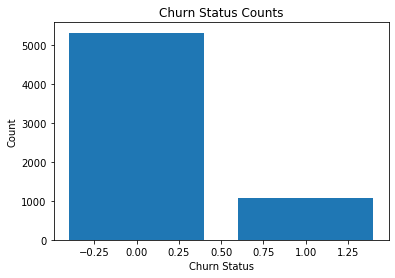

In [0]:
import matplotlib.pyplot as plt
# Count the churn status values
churn_counts = median_inactivity['churn_status'].value_counts()

# Plot the counts using a bar plot
plt.bar(churn_counts.index, churn_counts.values)

# Add labels and title to the plot
plt.title('Churn Status Counts')
plt.xlabel('Churn Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [0]:
churn_counts = median_inactivity['churn_status'].value_counts()
churn_counts

Out[8]: 0    5310
1    1067
Name: churn_status, dtype: int64

In [0]:
receipt_lines_df = spark.sql('SELECT * FROM receipt_lines').toPandas()

In [0]:
time_series_data = pd.merge(receipts_df,median_inactivity, how ='left', on = 'customer_id')
time_series_data['purchased_at'] = pd.to_datetime(time_series_data['purchased_at'])
time_series_data

,receipt_id,purchased_at,customer_id,store_code,till_number,churn_status_old,median_diff,churn_status
0,54209,2022-03-22,1,1,3,0,12,0
1,17979,2022-03-15,1,1,4,0,12,0
2,39346,2022-03-09,1,1,4,0,12,0
3,47231,2022-02-14,1,1,5,0,12,0
4,11274,2022-02-10,1,1,3,0,12,0
...,...,...,...,...,...,...,...,...
76489,52628,2020-09-21,16317,1,6,1,10,0
76490,28338,2020-09-07,16317,1,5,1,10,0
76491,74087,2020-08-06,16317,1,6,1,10,0
76492,14788,2020-07-31,16317,1,8,1,10,0


In [0]:
import pandas as pd
final_time_series = pd.merge(time_series_data,receipt_lines_df, how ='inner', on = 'receipt_id')
final_time_series

,receipt_id,purchased_at,customer_id,store_code,till_number,churn_status_old,median_diff,churn_status,receipt_line_id,product_code,qty,value
0,54209,2022-03-22,1,1,3,0,12,0,220284,14217,1,0.66
1,54209,2022-03-22,1,1,3,0,12,0,220283,14324,1,1.99
2,17979,2022-03-15,1,1,4,0,12,0,220329,12834,1,0.73
3,17979,2022-03-15,1,1,4,0,12,0,220321,14217,1,1.28
4,17979,2022-03-15,1,1,4,0,12,0,220322,11180,1,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...
702949,75560,2020-07-26,16317,1,5,1,10,0,330435,14204,10,1.97
702950,75560,2020-07-26,16317,1,5,1,10,0,330437,15210,2,5.36
702951,75560,2020-07-26,16317,1,5,1,10,0,330434,6377,1,1.55
702952,75560,2020-07-26,16317,1,5,1,10,0,330432,6731,1,0.52


In [0]:
%sql
CREATE OR REPLACE TABLE missing_dates AS 
SELECT r.customer_id,
       MIN(r.purchased_at) AS min_purchase_day,
       MAX(r.purchased_at) AS max_purchase_day,
       DATEDIFF(MAX(r.purchased_at), MIN(r.purchased_at)) AS expected_days,
       COUNT(DISTINCT r.purchased_at) AS days_have,
       DATEDIFF(CURRENT_DATE(), MAX(r.purchased_at)) AS missing_days
FROM receipts r
JOIN receipt_lines rl ON r.receipt_id = rl.receipt_id
GROUP BY r.customer_id

DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
missing_dates_df = spark.read.table("missing_dates")
missing_dates_df.show()

+-----------+----------------+----------------+-------------+---------+------------+
|customer_id|min_purchase_day|max_purchase_day|expected_days|days_have|missing_days|
+-----------+----------------+----------------+-------------+---------+------------+
|      15727|      2020-10-25|      2021-11-13|          384|       22|         544|
|       6336|      2020-10-27|      2022-03-11|          500|       56|         426|
|       1580|      2020-07-26|      2022-03-21|          603|      137|         416|
|       4935|      2020-08-07|      2022-03-10|          580|       16|         427|
|      14832|      2020-09-24|      2020-09-24|            0|        1|         959|
|       8086|      2020-08-08|      2022-03-12|          581|       32|         425|
|      10362|      2020-08-09|      2022-03-21|          589|       59|         416|
|      10623|      2020-10-27|      2022-01-29|          459|       27|         467|
|       6466|      2020-08-03|      2022-03-17|          591|    

In [0]:
final_receipts = spark.sql("""SELECT * FROM final_receipts """).toPandas()
final_receipts

,customer_id,purchased_at,value,receipt_id
0,3152,2021-05-02,3.23,40139
1,3152,2021-07-26,3.23,2293
2,3152,2021-02-01,3.23,65572
3,3152,2022-02-14,3.23,21542
4,2646,2021-01-31,5.99,6453
...,...,...,...,...
702949,10213,2021-09-06,9999999.00,7698
702950,10213,2021-09-06,9999999.00,7698
702951,10213,2021-09-06,9999999.00,7698
702952,10213,2021-09-06,9999999.00,7698


In [0]:
import pyspark.sql.functions as F

# Convert the Pandas DataFrame to a PySpark DataFrame
final_receipts_spark = spark.createDataFrame(final_receipts)

# get the minimum and maximum purchase dates
min_date, max_date = missing_dates_df.agg(F.min("min_purchase_day"), F.max("max_purchase_day")).first()

# generate a sequence of dates for each customer between the minimum and maximum purchase dates
all_dates = missing_dates_df.select("customer_id").distinct().withColumn("date", F.expr(f"sequence(to_date('{'2020-07-27'}'), to_date('{'2022-03-21'}'), interval 1 day)"))

# explode the date column to get one row for each date for each customer
all_dates = all_dates.select("customer_id", F.explode("date").alias("purchased_at"))

# join the all_dates DataFrame with the final_receipts DataFrame to get the value for each date for each customer
merged_df = all_dates.join(final_receipts_spark, ["customer_id", "purchased_at"], "left")

# fill in missing values with 0
merged_df.fillna(0, subset=["value"])
merged_df.show()

# Create or replace the date_merged table
merged_df.write.mode("overwrite").saveAsTable("date_merged")


+-----------+------------+-----+----------+
|customer_id|purchased_at|value|receipt_id|
+-----------+------------+-----+----------+
|      15727|  2020-07-27| null|      null|
|      15727|  2020-07-28| null|      null|
|      15727|  2020-07-29| null|      null|
|      15727|  2020-07-30| null|      null|
|      15727|  2020-07-31| null|      null|
|      15727|  2020-08-01| null|      null|
|      15727|  2020-08-02| null|      null|
|      15727|  2020-08-03| null|      null|
|      15727|  2020-08-04| null|      null|
|      15727|  2020-08-05| null|      null|
|      15727|  2020-08-06| null|      null|
|      15727|  2020-08-07| null|      null|
|      15727|  2020-08-08| null|      null|
|      15727|  2020-08-09| null|      null|
|      15727|  2020-08-10| null|      null|
|      15727|  2020-08-11| null|      null|
|      15727|  2020-08-12| null|      null|
|      15727|  2020-08-13| null|      null|
|      15727|  2020-08-14| null|      null|
|      15727|  2020-08-15| null|

In [0]:
date_merged_df = spark.sql("""SELECT * FROM date_merged """).toPandas()
date_merged_df.drop(['receipt_id'], inplace=True, axis=1)

In [0]:
date_merged_df

,customer_id,purchased_at,value
0,15727,2020-07-27,NaN
1,15727,2020-07-28,NaN
2,15727,2020-07-29,NaN
3,15727,2020-07-30,NaN
4,15727,2020-07-31,NaN
...,...,...,...
4468751,2376,2022-03-17,NaN
4468752,2376,2022-03-18,NaN
4468753,2376,2022-03-19,NaN
4468754,2376,2022-03-20,NaN


In [0]:
main = date_merged_df.merge(median_inactivity, on='customer_id', how='left')
main['value'] = main.value.fillna(0)

In [0]:
main[main.customer_id==2376]

,customer_id,purchased_at,value,median_diff,churn_status
4468133,2376,2020-07-27,0.0,0,0
4468134,2376,2020-07-28,0.0,0,0
4468135,2376,2020-07-29,0.0,0,0
4468136,2376,2020-07-30,0.0,0,0
4468137,2376,2020-07-31,0.0,0,0
...,...,...,...,...,...
4468751,2376,2022-03-17,0.0,0,0
4468752,2376,2022-03-18,0.0,0,0
4468753,2376,2022-03-19,0.0,0,0
4468754,2376,2022-03-20,0.0,0,0


In [0]:
main_spark=spark.createDataFrame(main) 
main_spark.write.mode("overwrite").saveAsTable("main_2")

In [0]:
main.rename(columns={'purchased_at': 'calendar_date'}, inplace=True)

In [0]:
main

,customer_id,calendar_date,value,median_diff,churn_status
0,15727,2020-07-27,0.0,8,0
1,15727,2020-07-28,0.0,8,0
2,15727,2020-07-29,0.0,8,0
3,15727,2020-07-30,0.0,8,0
4,15727,2020-07-31,0.0,8,0
...,...,...,...,...,...
4468751,2376,2022-03-17,0.0,0,0
4468752,2376,2022-03-18,0.0,0,0
4468753,2376,2022-03-19,0.0,0,0
4468754,2376,2022-03-20,0.0,0,0


In [0]:
clean = main.groupby(['customer_id', 'calendar_date']).agg({'value': 'sum', 'churn_status':'max'})

In [0]:
clean.reset_index(inplace=True)

In [0]:
clean['day'] = (pd.to_datetime(clean['calendar_date']) - pd.to_datetime(clean['calendar_date'].min())).dt.days

In [0]:
clean.day.value_counts()

Out[26]: 0      6377
396    6377
398    6377
399    6377
400    6377
       ... 
201    6377
202    6377
203    6377
204    6377
602    6377
Name: day, Length: 603, dtype: int64

In [0]:
clean['purchase_made'] = clean.value > 0

In [0]:
clean['calendar_date'] = pd.to_datetime(clean['calendar_date'])

In [0]:
clean

,customer_id,calendar_date,value,churn_status,day,purchase_made
0,1,2020-07-27,0.0,0,0,False
1,1,2020-07-28,0.0,0,1,False
2,1,2020-07-29,0.0,0,2,False
3,1,2020-07-30,0.0,0,3,False
4,1,2020-07-31,0.0,0,4,False
...,...,...,...,...,...,...
3845326,16317,2022-03-17,0.0,0,598,False
3845327,16317,2022-03-18,0.0,0,599,False
3845328,16317,2022-03-19,0.0,0,600,False
3845329,16317,2022-03-20,0.0,0,601,False


In [0]:

# Load the data into a DataFrame
df = clean.copy()

def extract_purchase(row):
    if row.purchase_made:
        return row.calendar_date
    else:
        return np.nan

df['purchased_at'] = df.apply(extract_purchase, axis=1)


In [0]:
df['purchased_at'] = df.purchased_at.fillna(method='ffill')

In [0]:
df['counter'] = (df.calendar_date - df.purchased_at).dt.days

In [0]:
df

,customer_id,calendar_date,value,churn_status,day,purchase_made,purchased_at,counter
0,1,2020-07-27,0.0,0,0,False,NaT,NaN
1,1,2020-07-28,0.0,0,1,False,NaT,NaN
2,1,2020-07-29,0.0,0,2,False,NaT,NaN
3,1,2020-07-30,0.0,0,3,False,NaT,NaN
4,1,2020-07-31,0.0,0,4,False,NaT,NaN
...,...,...,...,...,...,...,...,...
3845326,16317,2022-03-17,0.0,0,598,False,2022-03-03,14.0
3845327,16317,2022-03-18,0.0,0,599,False,2022-03-03,15.0
3845328,16317,2022-03-19,0.0,0,600,False,2022-03-03,16.0
3845329,16317,2022-03-20,0.0,0,601,False,2022-03-03,17.0


In [0]:
def churn_getter(row):
    if row.counter > 64:
        return 1
    else:
        return 0

df['churn_status'] = df.apply(churn_getter, axis=1)

In [0]:
df


,customer_id,calendar_date,value,churn_status,day,purchase_made,purchased_at,counter
0,1,2020-07-27,0.0,0,0,False,NaT,NaN
1,1,2020-07-28,0.0,0,1,False,NaT,NaN
2,1,2020-07-29,0.0,0,2,False,NaT,NaN
3,1,2020-07-30,0.0,0,3,False,NaT,NaN
4,1,2020-07-31,0.0,0,4,False,NaT,NaN
...,...,...,...,...,...,...,...,...
3845326,16317,2022-03-17,0.0,0,598,False,2022-03-03,14.0
3845327,16317,2022-03-18,0.0,0,599,False,2022-03-03,15.0
3845328,16317,2022-03-19,0.0,0,600,False,2022-03-03,16.0
3845329,16317,2022-03-20,0.0,0,601,False,2022-03-03,17.0


In [0]:
df['day'].max()

Out[36]: 602

In [0]:
# convert the pandas DataFrame to a Spark DataFrame
mldf = spark.createDataFrame(df)

# register the Spark DataFrame as a table
mldf.createOrReplaceTempView('df_table')

Creating input features and running baseline model

In [0]:
%sql
CREATE OR REPLACE TABLE all_ml_data_pts AS
WITH churn_value_ts (
  SELECT    day as day
          , customer_id
          , MAX(churn_status) as churn_status
          , SUM(value) AS total_value
  FROM df_table
  GROUP BY 1,2
)
SELECT *
FROM (
  SELECT day 
          , customer_id
          , churn_status as to_predict
          , LAG(churn_status,1) OVER (PARTITION BY customer_id ORDER BY day) as cs_1
          , LAG(churn_status,7) OVER (PARTITION BY customer_id ORDER BY day) as cs_7
          , LAG(churn_status,30) OVER (PARTITION BY customer_id ORDER BY day) as cs_30
          , day % 364 woy
          , day % 30 wom
          , total_value
  FROM churn_value_ts
) 
WHERE day >= 30


DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
def get_temporal_X_y( ref_day, debug = False ):
  sql = f"""
  SELECT *
  FROM all_ml_data_pts
  WHERE day = {ref_day}
  """
  if debug:
    print(sql)
    
  Xy = spark.sql(sql).toPandas()
  X = Xy.drop(columns = ['to_predict'])
  y = Xy.to_predict.to_numpy()
  return X, y

In [0]:
X, y = get_temporal_X_y(602)
X, y

Out[40]: (      day  customer_id  cs_1  cs_7  cs_30  woy  wom  total_value
 0     602           16     1     1      1  238    2          0.0
 1     602           23     0     0      0  238    2          0.0
 2     602           46     0     0      0  238    2          0.0
 3     602           53     0     0      1  238    2          0.0
 4     602           60     1     1      1  238    2          0.0
 ...   ...          ...   ...   ...    ...  ...  ...          ...
 6372  602        16084     1     1      1  238    2          0.0
 6373  602        16085     1     1      1  238    2          0.0
 6374  602        16107     1     1      1  238    2          0.0
 6375  602        16177     1     1      1  238    2          0.0
 6376  602        16269     1     1      1  238    2          0.0
 
 [6377 rows x 8 columns],
 array([1, 0, 0, ..., 1, 1, 1]))

In [0]:
# Now let's create the data for a "Single train/validation, single held out test" evaluation.
# This just means selecting X,y data for three different time points:
 
test_ref_day = 602 
 
valid_ref_day = 601
 
train_ref_day = 600

In [0]:
# Let's get them!
X_test, y_test = get_temporal_X_y(test_ref_day)
X_valid, y_valid = get_temporal_X_y(valid_ref_day)
X_train, y_train = get_temporal_X_y(train_ref_day)

In [0]:
# Our baseline here is going to be very simple - for the prediction day, predict what was sold the day before.
# This is particularly simple for us to get as this value (the sales_value lagged by one day) was one of our input features
 
baseline = X_valid.cs_7.to_numpy()

In [0]:
# For a basic model we're just going to use LogisticRegression
 
from sklearn.linear_model import LogisticRegression
import numpy as np
 
 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
 
 
print(f'lr: {y_pred}')
print(f'bl: {baseline}')
print(f'tr: {y_valid}')
 

lr: [1 0 0 ... 1 1 1]
bl: [1 0 0 ... 1 1 1]
tr: [1 0 0 ... 1 1 1]


In [0]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


Changing input features and baseline (mention reason in report)

In [0]:
%sql
CREATE OR REPLACE TABLE all_ml_data_pts AS
WITH churn_value_ts (
  SELECT    day as day
          , customer_id
          , MAX(churn_status) as churn_status
          , SUM(value) AS total_value
  FROM df_table
  GROUP BY 1,2
)
SELECT *
FROM (
  SELECT day 
          , customer_id
          , churn_status as to_predict
          , LAG(churn_status,28) OVER (PARTITION BY customer_id ORDER BY day) as cs_28
          , LAG(churn_status,64) OVER (PARTITION BY customer_id ORDER BY day) as cs_64
          , LAG(churn_status,128) OVER (PARTITION BY customer_id ORDER BY day) as cs_128
          , day % 364 woy
          , day % 30 wom
          , total_value
  FROM churn_value_ts
) 
WHERE day >= 30


DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
# Getting temporal values
def get_temporal_X_y( ref_day, debug = False ):
  sql = f"""
  SELECT *
  FROM all_ml_data_pts
  WHERE day = {ref_day}
  """
  if debug:
    print(sql)
    
  Xy = spark.sql(sql).toPandas()
  X = Xy.drop(columns = ['to_predict'])
  y = Xy.to_predict.to_numpy()
  return X, y

In [0]:
X, y = get_temporal_X_y(602)
X, y

Out[48]: (      day  customer_id  cs_28  cs_64  cs_128  woy  wom  total_value
 0     602           16      1      1       1  238    2          0.0
 1     602           23      0      0       0  238    2          0.0
 2     602           46      0      1       0  238    2          0.0
 3     602           53      1      1       1  238    2          0.0
 4     602           60      1      1       1  238    2          0.0
 ...   ...          ...    ...    ...     ...  ...  ...          ...
 6372  602        16084      1      0       0  238    2          0.0
 6373  602        16085      1      1       1  238    2          0.0
 6374  602        16107      1      1       1  238    2          0.0
 6375  602        16177      1      1       1  238    2          0.0
 6376  602        16269      1      1       1  238    2          0.0
 
 [6377 rows x 8 columns],
 array([1, 0, 0, ..., 1, 1, 1]))

In [0]:
# creating the data for a "Single train/validation, single held out test" evaluation.
# This just means selecting X,y data for three different time points:
 
test_ref_day = 602 
 
valid_ref_day = 601
 
train_ref_day = 600

In [0]:

X_test, y_test = get_temporal_X_y(test_ref_day)
X_valid, y_valid = get_temporal_X_y(valid_ref_day)
X_train, y_train = get_temporal_X_y(train_ref_day)

In [0]:
# baseline prediction
 
baseline = X_valid.cs_28.to_numpy()

In [0]:
# Using basic m LogisticRegression
 
from sklearn.linear_model import LogisticRegression
import numpy as np
 
 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
 
 
print(f'lr: {y_pred}')
print(f'bl: {baseline}')
print(f'tr: {y_valid}')
 

lr: [1 0 0 ... 1 1 1]
bl: [1 0 0 ... 1 1 1]
tr: [1 0 0 ... 1 1 1]


In [0]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.84


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2295
           1       0.86      0.89      0.88      4082

    accuracy                           0.84      6377
   macro avg       0.83      0.82      0.82      6377
weighted avg       0.84      0.84      0.84      6377



In [0]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_valid, y_pred)
print(f'Confusion matrix:\n{conf_matrix}')


Confusion matrix:
[[1722  573]
 [ 448 3634]]


Single train/validation, single held out test - extending the training set to sample multiple historic data points

In [0]:
from tqdm import tqdm
import pandas as pd
import numpy as np
 
test_ref_day = 602 
 
# let's consider our validation set
valid_ref_day = 601
 
# let's get our train set
train_ref_day = 600
 
# let's get our train set
# recall train data can be selected for any time point *historically before* your validation or test labels
train_ref_days = np.asarray( range(train_ref_day-100,train_ref_day+1) ) # range is inc. exc.

In [0]:
# modifying the get_temporal_X_y(..) function to select points for all days we want to request
 
def get_temporal_X_y( ref_days, debug = False ):
  

  if isinstance(ref_days, int):
    ref_days = [ref_days] 
  
  sql = f"""
  SELECT *
  FROM all_ml_data_pts
  WHERE day IN ({ ','.join([ str(x) for x in ref_days])  })
  """
  if debug:
    print(sql)
    
  Xy = spark.sql(sql).toPandas()
  X = Xy.drop(columns = ['to_predict'])
  y = Xy.to_predict.to_numpy()
  return X, y
  

In [0]:

 
X_test, y_test = get_temporal_X_y(test_ref_day)
X_valid, y_valid = get_temporal_X_y(valid_ref_day)
 
X_train, y_train = get_temporal_X_y(train_ref_days)

In [0]:
# building a simple model and get the baseline
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
 
 
print(f'lr: {y_pred}')
print(f'bl: {baseline}')
print(f'tr: {y_valid}')

lr: [1 0 0 ... 1 1 1]
bl: [1 0 0 ... 1 1 1]
tr: [1 0 0 ... 1 1 1]


In [0]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.88


Repeated train/validation, single held out test

In [0]:
#create a function to fetch data for a single train/valid set
 
def get_train_valid_set( ref_day = 601 ):
  
  X_valid, y_valid = get_temporal_X_y( ref_day )
  
  train_ref_days = range(ref_day-10,ref_day) # -1 compared to last time as our ref_day is the valid_ref_day, not train_ref_day
  
  X_train, y_train = get_temporal_X_y(train_ref_days)
  
  return X_train, y_train, X_valid, y_valid

In [0]:
%sql
-- give database row numbers and use as the index
CREATE OR REPLACE TABLE all_ml_data_pts_with_index AS
SELECT row_number() OVER (ORDER BY customer_id, day) - 1 as idx, * -- minus one as row_number() is 1 indexed but pandas is zero indexed
FROM all_ml_data_pts
ORDER BY customer_id, day

DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
# Update functions to return indexes
def get_temporal_X_y_idxs( ref_days, debug = False ):
  

  if isinstance(ref_days, int):
    ref_days = [ref_days] 
  
  sql = f"""
  SELECT idx
  FROM all_ml_data_pts_with_index
  WHERE day IN ({ ','.join([ str(x) for x in ref_days])  })
  """
  if debug:
    print(sql)
    
  return spark.sql(sql).toPandas().idx.to_numpy()

In [0]:
def get_train_valid_set_idxs( ref_day = 602 ):
  
  valid_idxs = get_temporal_X_y_idxs( ref_day )
  
  train_ref_days = range(ref_day-10,ref_day) # -1 compared to last time as our ref_day is the valid_ref_day, not train_ref_day
  
  train_idxs = get_temporal_X_y_idxs(train_ref_days )
  
  return train_idxs, valid_idxs

In [0]:
# Single train/validation, single held out test - extending the training set to sample multiple historic data points
 
 
valid_ref_day = 601
 
train_ref_day = 600
 
# Get the base dataframe
Xy = spark.sql("SELECT * FROM all_ml_data_pts_with_index ORDER BY idx").toPandas() # ORDER BY idx is cruital to ensure the dataframe matches the indexes
X = Xy.drop(columns = ['idx', 'to_predict'])
y = Xy.to_predict.to_numpy()
 
train_idxs, valid_idxs = get_train_valid_set_idxs( ref_day = valid_ref_day)
 
X_valid = X.iloc[valid_idxs]
y_valid = y[valid_idxs]
 
X_train = X.iloc[train_idxs]
y_train = y[train_idxs]  

In [0]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
baseline = X_valid.cs_28.to_numpy()
 
 
print(f'lr: {y_pred}')
print(f'bl: {baseline}')
print(f'tr: {y_valid}')

lr: [0 1 1 ... 0 1 0]
bl: [0 1 1 ... 0 1 0]
tr: [0 1 1 ... 0 1 0]


In [0]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.88


In [0]:
from sklearn.model_selection import cross_val_score

# Repeated train/validation, single held out test
 
 
# Get the base dataframe
Xy = spark.sql("SELECT * FROM all_ml_data_pts_with_index ORDER BY idx").toPandas() # ORDER BY idx is cruital to ensure the dataframe matches the indexes
X = Xy.drop(columns = ['idx', 'to_predict'])
y = Xy.to_predict.to_numpy()
 
# define the number of validation sets to get
num_sets = 2 
 
all_cv_indexes = []
 
valid_ref_day = 601
 
for set_num in range(num_sets):
  train_idxs, valid_idxs = get_train_valid_set_idxs( ref_day = valid_ref_day)
  all_cv_indexes.append( (train_idxs, valid_idxs) )
  valid_ref_day -= 1
 
cross_val_score(lr, X, y, cv = all_cv_indexes, scoring = 'accuracy')

Out[68]: array([0.87893994, 0.8819194 ])

REFINE

In [0]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 10000)

lr_score_per_dataset = cross_val_score(lr, X, y, cv = all_cv_indexes, scoring = 'accuracy')*-1

baseline_score_per_dataset = []
for train_idxs, valid_idxs in all_cv_indexes:
    baseline = X.iloc[valid_idxs].cs_28.to_numpy()
    y_valid = y[valid_idxs]
    baseline_score_per_dataset.append( accuracy_score(y_valid, baseline) )


In [0]:
print(f'lr: {y_pred}')
print(f'bl: {baseline}')
print(f'tr: {y_valid}')

lr: [0 1 1 ... 0 1 0]
bl: [0 1 1 ... 0 1 0]
tr: [0 1 1 ... 0 1 0]


In [0]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


USING BOOSTING ALGORITHM INSTEAD

In [0]:
from lightgbm import LGBMClassifier
grid  = {
  'learning_rate': [0.05,0.1,0.15],
  'max_depth': [3,5,10],
  'feature_fraction': [0.4,0.5,0.7],
  'subsample': [0.1,0.2,0.5],
  'n_estimators': [25,50,100]
  }
 

In [0]:
from sklearn.model_selection import GridSearchCV
lgbm = LGBMClassifier(n_jobs=-1, lambda_l2=1, random_state=42, boosting_type='dart', class_weight='balanced')
lgbm_gs = GridSearchCV(lgbm, grid, cv=all_cv_indexes, scoring='accuracy')

_ = lgbm_gs.fit(X, y)


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: f

In [0]:
print(f'Mean lr: {np.mean(lr_score_per_dataset)}')
print(f'Mean bl: {np.mean(baseline_score_per_dataset)}')
print(f'Mean lg: {np.max(lgbm_gs.cv_results_["mean_test_score"])*-1}')
print(lgbm_gs.best_params_)

Mean lr: -0.8804296691234124
Mean bl: 0.8777638387956719
Mean lg: -0.8820762113846636
{'feature_fraction': 0.7, 'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.1}


In [0]:
lgbm = LGBMClassifier(n_jobs=-1, lambda_l2=1, random_state=42, boosting_type='dart', class_weight='balanced', 
                      **{'feature_fraction': 0.7, 'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.1})
lgbm.fit(X, y)


Out[75]: LGBMClassifier(boosting_type='dart', class_weight='balanced',
               feature_fraction=0.7, lambda_l2=1, learning_rate=0.15,
               max_depth=10, random_state=42, subsample=0.1)

In [0]:
y_pred = lgbm.predict(X_test)

In [0]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1745  540]
 [ 266 3826]]


In [0]:
from sklearn.metrics import classification_report

y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2285
           1       0.88      0.93      0.90      4092

    accuracy                           0.87      6377
   macro avg       0.87      0.85      0.86      6377
weighted avg       0.87      0.87      0.87      6377



In [0]:
feature_importances = pd.DataFrame(lgbm.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances.head(10))


             importance
customer_id        1192
day                 669
woy                 475
total_value         260
cs_128              149
cs_64               144
cs_28                74
wom                  37


In [0]:
import numpy as np

unique_labels, label_counts = np.unique(y_pred, return_counts=True)
print("Churn label counts:")
for label, count in zip(unique_labels, label_counts):
    print(f"Churn {label}: {count}")


Churn label counts:
Churn 0: 2011
Churn 1: 4366


PEN PROFILES

In [0]:
final_time_series

,receipt_id,purchased_at,customer_id,store_code,till_number,churn_status_old,median_diff,churn_status,receipt_line_id,product_code,qty,value
0,54209,2022-03-22,1,1,3,0,12,0,220284,14217,1,0.66
1,54209,2022-03-22,1,1,3,0,12,0,220283,14324,1,1.99
2,17979,2022-03-15,1,1,4,0,12,0,220329,12834,1,0.73
3,17979,2022-03-15,1,1,4,0,12,0,220321,14217,1,1.28
4,17979,2022-03-15,1,1,4,0,12,0,220322,11180,1,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...
702949,75560,2020-07-26,16317,1,5,1,10,0,330435,14204,10,1.97
702950,75560,2020-07-26,16317,1,5,1,10,0,330437,15210,2,5.36
702951,75560,2020-07-26,16317,1,5,1,10,0,330434,6377,1,1.55
702952,75560,2020-07-26,16317,1,5,1,10,0,330432,6731,1,0.52


In [0]:
final_time_series['churn_status'].value_counts()

Out[84]: 0    656804
1     46150
Name: churn_status, dtype: int64

In [0]:
product_category = spark.sql('SELECT * FROM products').toPandas()
product_category

,product_code,product_details,department_code,department_name,category_code,category_details,sub_category_code,sub_category_details
0,2967,RED BULL STIMULA,-2,RI Missing Departme,-2,RI Missing Secti,-2,RI Missing Sub_Secti
1,8356,MACB SPRING STRA,-2,RI Missing Departme,-2,RI Missing Secti,-2,RI Missing Sub_Secti
2,5551,TULIP UNSMOKED B,-2,RI Missing Departme,-2,RI Missing Secti,-2,RI Missing Sub_Secti
3,4775,SANGS AMERICAN C,-2,RI Missing Departme,-2,RI Missing Secti,-2,RI Missing Sub_Secti
4,10456,FREE RANGE EGGS,-2,RI Missing Departme,-2,RI Missing Secti,-2,RI Missing Sub_Secti
...,...,...,...,...,...,...,...,...
17881,13555,NESTLE AFTER EIG,18,GROCERY 3,86,CONFECTIONERY,74,CHRISTMAS
17882,6946,NESTLE AFTER EIG,18,GROCERY 3,86,CONFECTIONERY,74,CHRISTMAS
17883,11155,NESTLE QUALITY S,18,GROCERY 3,86,CONFECTIONERY,74,CHRISTMAS
17884,14186,ELIZABETH SHAW C,18,GROCERY 3,86,CONFECTIONERY,74,CHRISTMAS


In [0]:
pen_profile_df = final_time_series.merge(product_category, on='product_code')
pen_profile_df

,receipt_id,purchased_at,customer_id,store_code,till_number,churn_status_old,median_diff,churn_status,receipt_line_id,product_code,qty,value,product_details,department_code,department_name,category_code,category_details,sub_category_code,sub_category_details
0,54209,2022-03-22,1,1,3,0,12,0,220284,14217,1,0.66,BANANAS LOOSE PE,25,FRUIT & VEGETABLES,55,FRUIT,79,FRUIT - BANANAS
1,17979,2022-03-15,1,1,4,0,12,0,220321,14217,1,1.28,BANANAS LOOSE PE,25,FRUIT & VEGETABLES,55,FRUIT,79,FRUIT - BANANAS
2,11274,2022-02-10,1,1,3,0,12,0,220354,14217,1,1.08,BANANAS LOOSE PE,25,FRUIT & VEGETABLES,55,FRUIT,79,FRUIT - BANANAS
3,30780,2021-12-13,1,1,3,0,12,0,220313,14217,1,1.04,BANANAS LOOSE PE,25,FRUIT & VEGETABLES,55,FRUIT,79,FRUIT - BANANAS
4,36653,2021-11-30,1,1,5,0,12,0,220339,14217,1,0.76,BANANAS LOOSE PE,25,FRUIT & VEGETABLES,55,FRUIT,79,FRUIT - BANANAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702949,19978,2021-10-07,16304,1,3,1,11,0,126336,3190,1,0.78,BELLS GRANARY LO,33,BAKERY,61,BREAD,25,BREAD - BROWN GRAIN
702950,27672,2021-07-17,16304,1,3,1,11,0,126259,4221,1,2.09,MAXWELL HOUSE IN,31,GROCERY 2,8,HOT BEVERAGES,42,INSTANT COFFEE - GRA
702951,8703,2020-10-01,16312,1,2,1,49,0,185001,16979,1,1.85,TOM AND JERRY EA,9,NEWSPAPERS & MAGAZI,19,MAGAZINES,38,COMICS TEENAGE - COM
702952,55258,2020-07-25,16312,1,3,1,49,0,185019,17008,1,5.10,HINARI 2 SLICE T,35,ELECTRICAL,42,SMALL ELECTRICAL,83,TOASTERS - 2 SLICE


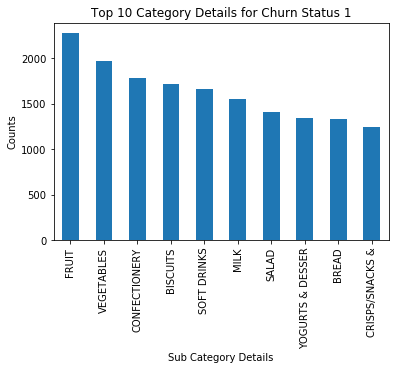

In [0]:
import matplotlib.pyplot as plt

# group the data by sub_category_details and count the number of rows in each group
category_counts_churn = pen_profile_df[pen_profile_df['churn_status'] == 1].groupby('category_details').size()

# select only the top 10 categories by count
top_categories = category_counts_churn.nlargest(10)

# create a bar chart of the counts
top_categories.plot(kind='bar')

# set chart title and axis labels
plt.title('Top 10 Category Details for Churn Status 1')
plt.xlabel('Sub Category Details')
plt.ylabel('Counts')

# display the chart
plt.show()


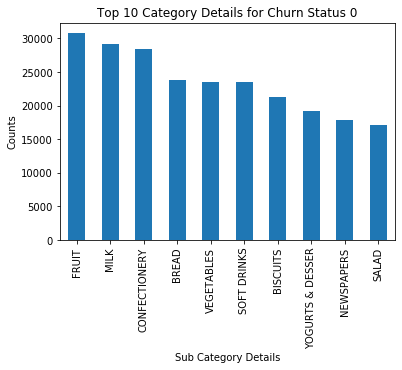

In [0]:
import matplotlib.pyplot as plt

# group the data by sub_category_details and count the number of rows in each group
category_counts_active = pen_profile_df[pen_profile_df['churn_status'] == 0].groupby('category_details').size()

# select only the top 10 categories by count
top_categories_active = category_counts_active.nlargest(10)

# create a bar chart of the counts
top_categories_active.plot(kind='bar')

# set chart title and axis labels
plt.title('Top 10 Category Details for Churn Status 0')
plt.xlabel('Sub Category Details')
plt.ylabel('Counts')

# display the chart
plt.show()


In [0]:
# group the data by churn_status and calculate the mean of the qty column
avg_qty_by_churn_label_0 = pen_profile_df[pen_profile_df['churn_status'] == 0].groupby('churn_status')['qty'].mean()

# print the result
print(avg_qty_by_churn_label_0)


churn_status
0    1.20462
Name: qty, dtype: float64


In [0]:
# group the data by churn_status and calculate the mean of the qty column
avg_qty_by_churn_label_1 = pen_profile_df[pen_profile_df['churn_status'] == 1].groupby('churn_status')['qty'].mean()

# print the result
print(avg_qty_by_churn_label_1)


churn_status
1    1.235146
Name: qty, dtype: float64


In [0]:
# group the data by churn_status and calculate the mean of the qty column
avg_value_by_churn_label_0 = pen_profile_df[pen_profile_df['churn_status'] == 0].groupby('churn_status')['value'].mean()

# print the result
print(avg_value_by_churn_label_0)


churn_status
0    138.655592
Name: value, dtype: float64


In [0]:
# group the data by churn_status and calculate the mean of the qty column
avg_value_by_churn_label_1 = pen_profile_df[pen_profile_df['churn_status'] == 1].groupby('churn_status')['value'].mean()

# print the result
print(avg_value_by_churn_label_1)


churn_status
1    1.879236
Name: value, dtype: float64


In [0]:
# group the data by churn_status and sub_category_details, and calculate the sum of the value column
churn_label_0_category_value = pen_profile_df[pen_profile_df['churn_status'] == 0].groupby(['churn_status', 'category_details'])['value'].sum()

# sort the values in descending order and take the top 10 subcategories
top_10_categories_value = churn_label_0_category_value.sort_values(ascending=False).head(10)

# print the result
print(top_10_categories_value)


churn_status  category_details
0             CANNED & PACKET     30004707.64
              SOFT DRINKS         10027067.54
              BREAD               10022226.84
              FRESH BEEF          10022006.08
              HOT BEVERAGES       10017984.72
              PIES                10010288.02
              CANNED & DRIED V    10008767.62
              CIGARETTES             81633.69
              PAYPOINT               63997.14
              FRUIT                  35373.06
Name: value, dtype: float64


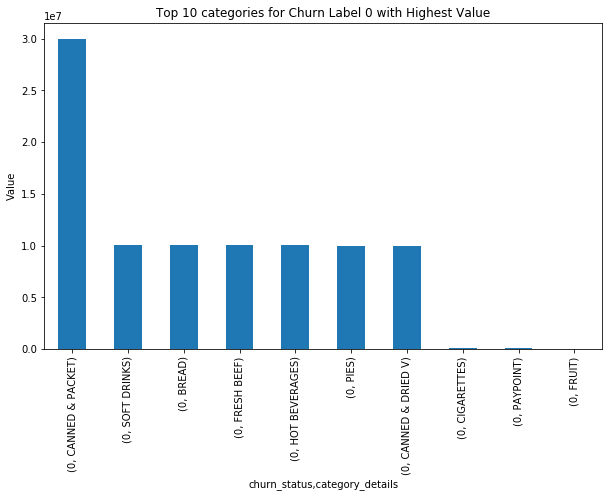

In [0]:
plt.figure(figsize=(10,6))
plt.title('Top 10 categories for Churn Label 0 with Highest Value')
plt.ylabel('Value')
top_10_categories_value.plot.bar()
plt.show()

In [0]:
# group the data by churn_status and sub_category_details, and calculate the sum of the value column
churn_label_1_category_value = pen_profile_df[pen_profile_df['churn_status'] == 1].groupby(['churn_status', 'category_details'])['value'].sum()

# sort the values in descending order and take the top 10 subcategories
top_10_categories_value_2 = churn_label_1_category_value.sort_values(ascending=False).head(10)

# print the result
print(top_10_categories_value_2)


churn_status  category_details
1             PAYPOINT            8963.84
              CIGARETTES          5259.69
              FRUIT               2877.07
              SPIRITS             2411.76
              SOFT DRINKS         2307.67
              CONFECTIONERY       2114.88
              FRESH BEEF          2054.97
              COOKED MEAT         1888.09
              MILK                1783.10
              BEER/LAGER & CID    1735.09
Name: value, dtype: float64


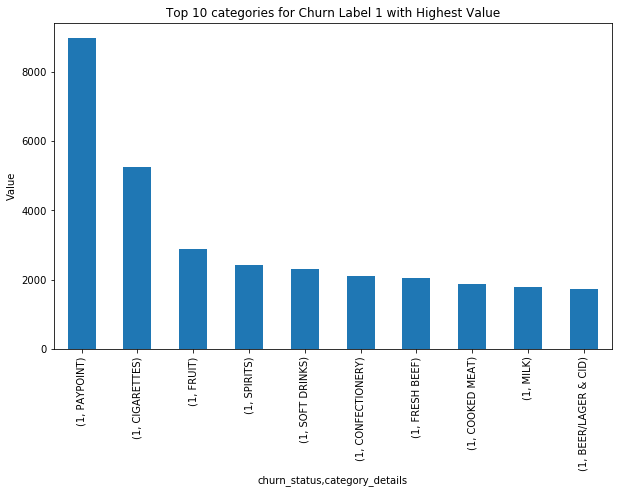

In [0]:
plt.figure(figsize=(10,6))
plt.title('Top 10 categories for Churn Label 1 with Highest Value')
plt.ylabel('Value')
top_10_categories_value_2.plot.bar()
plt.show()